In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.6 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')  # If stored in Google Drive

# If uploaded manually
!unzip "/content/drive/MyDrive/soildetection.v2i.yolov11.zip" -d /content/dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/soildetection.v2i.yolov11.zip
  inflating: /content/dataset/README.dataset.txt  
  inflating: /content/dataset/README.roboflow.txt  
  inflating: /content/dataset/data.yaml  
   creating: /content/dataset/test/
   creating: /content/dataset/test/images/
 extracting: /content/dataset/test/images/Black_38_jpg.rf.cce2afe5e739cb1d77fbdfd7d51d5012.jpg  
 extracting: /content/dataset/test/images/Black_44_jpg.rf.bfb078e5b0304edb36b2cc1d57ea3cbc.jpg  
 extracting: /content/dataset/test/images/Black_47_jpg.rf.30fa0ac078480d4fbb2bdb6bd4c189c3.jpg  
 extracting: /content/dataset/test/images/Clay_47_jpg.rf.75ea8b632fb8f5e1a540b31945d9ff4d.jpg  
 extracting: /content/dataset/test/images/Copy-of-clay-soil-cropped_jpg.rf.9dfcef24065c2fa79a282f89bff22b80.jpg  
 extracting: /content/dataset/test/images/Copy-of-image14_jpeg.rf.4e376475395c1adc2

In [7]:
from ultralytics import YOLO
import os

ROOT_DIR = '/content/dataset'
DATA_YAML = os.path.join(ROOT_DIR, 'data.yaml')

# Load YOLOv11 nano segmentation model
model = YOLO("yolo11n.pt")  # YOLOv11-nano

# Train the model
model.train(
    data=DATA_YAML,
    epochs=100,
    imgsz=640,
    batch=16,            # adjust according to GPU
    name="yolo_soil_seg" # saves results in /content/runs/detect/yolo_soil_seg
)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_soil_seg, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x785f24fd5700>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [8]:
!ls '/content/runs/detect/yolo_soil_seg/weights'

best.pt  last.pt


In [10]:
!yolo task=segment mode=val \
  model="/content/runs/detect/yolo_soil_seg/weights/best.pt" \
  data="{DATA_YAML}" \
  imgsz=640

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2178.7±148.6 MB/s, size: 82.5 KB)
val: Scanning /content/dataset/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 58/58 878.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.2it/s 1.8s
                   all         58         72      0.538      0.532      0.556      0.347
         Alluvial Soil         18         21      0.419      0.571      0.583      0.313
            Black Soil         17         21      0.856      0.857       0.85      0.542
             Clay Soil          9         11      0.449      0.227      0.313      0.20

In [11]:
import pandas as pd

# Create a DataFrame with your validation metrics
data = {
    "Class": ["Alluvial Soil", "Black Soil", "Clay Soil", "Red Soil"],
    "Images": [18, 17, 9, 15],
    "Instances": [21, 21, 11, 19],
    "Precision": [0.419, 0.856, 0.449, 0.429],
    "Recall": [0.571, 0.857, 0.227, 0.474],
    "mAP50": [0.583, 0.85, 0.313, 0.477],
    "mAP50-95": [0.313, 0.542, 0.203, 0.329]
}

df = pd.DataFrame(data)

# Calculate F1 score
df["F1"] = 2 * (df["Precision"] * df["Recall"]) / (df["Precision"] + df["Recall"])

# Round to 3 decimals for readability
df = df.round(3)

# Display
df

,Class,Images,Instances,Precision,Recall,mAP50,mAP50-95,F1
0,Alluvial Soil,18,21,0.419,0.571,0.583,0.313,0.483
1,Black Soil,17,21,0.856,0.857,0.850,0.542,0.856
2,Clay Soil,9,11,0.449,0.227,0.313,0.203,0.302
3,Red Soil,15,19,0.429,0.474,0.477,0.329,0.450


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Images'].plot(kind='hist', bins=20, title='Images')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Instances'].plot(kind='hist', bins=20, title='Instances')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Images', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Images', y='Instances', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Instances', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Images']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Class')):
  _plot_series(series, series_name, i)
  fig.legend(title='Class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Images')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Instances']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Class')):
  _plot_series(series, series_name, i)
  fig.legend(title='Class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Instances')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Precision']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Class')):
  _plot_series(series, series_name, i)
  fig.legend(title='Class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Precision')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Class')):
  _plot_series(series, series_name, i)
  fig.legend(title='Class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Recall')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Images'].plot(kind='line', figsize=(8, 4), title='Images')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Instances'].plot(kind='line', figsize=(8, 4), title='Instances')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Images', y='Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Instances', y='Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Precision', y='Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [14]:
!yolo task=segment mode=predict \
  model="/content/runs/detect/yolo_soil_seg/weights/best.pt" \
  source="/content/dataset/test/images" \
  conf=0.25 \
  save=True

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/28 /content/dataset/test/images/Black_38_jpg.rf.cce2afe5e739cb1d77fbdfd7d51d5012.jpg: 640x640 1 Black Soil, 15.2ms
image 2/28 /content/dataset/test/images/Black_44_jpg.rf.bfb078e5b0304edb36b2cc1d57ea3cbc.jpg: 640x640 1 Black Soil, 7.9ms
image 3/28 /content/dataset/test/images/Black_47_jpg.rf.30fa0ac078480d4fbb2bdb6bd4c189c3.jpg: 640x640 1 Black Soil, 8.0ms
image 4/28 /content/dataset/test/images/Clay_47_jpg.rf.75ea8b632fb8f5e1a540b31945d9ff4d.jpg: 640x640 1 Clay Soil, 7.9ms
image 5/28 /content/dataset/test/images/Copy-of-clay-soil-cropped_jpg.rf.9dfcef24065c2fa79a282f89bff22b80.jpg: 640x640 1 Clay Soil, 7.9ms
image 6/28 /content/dataset/test/images/Copy-of-image14_jpeg.rf.4e3

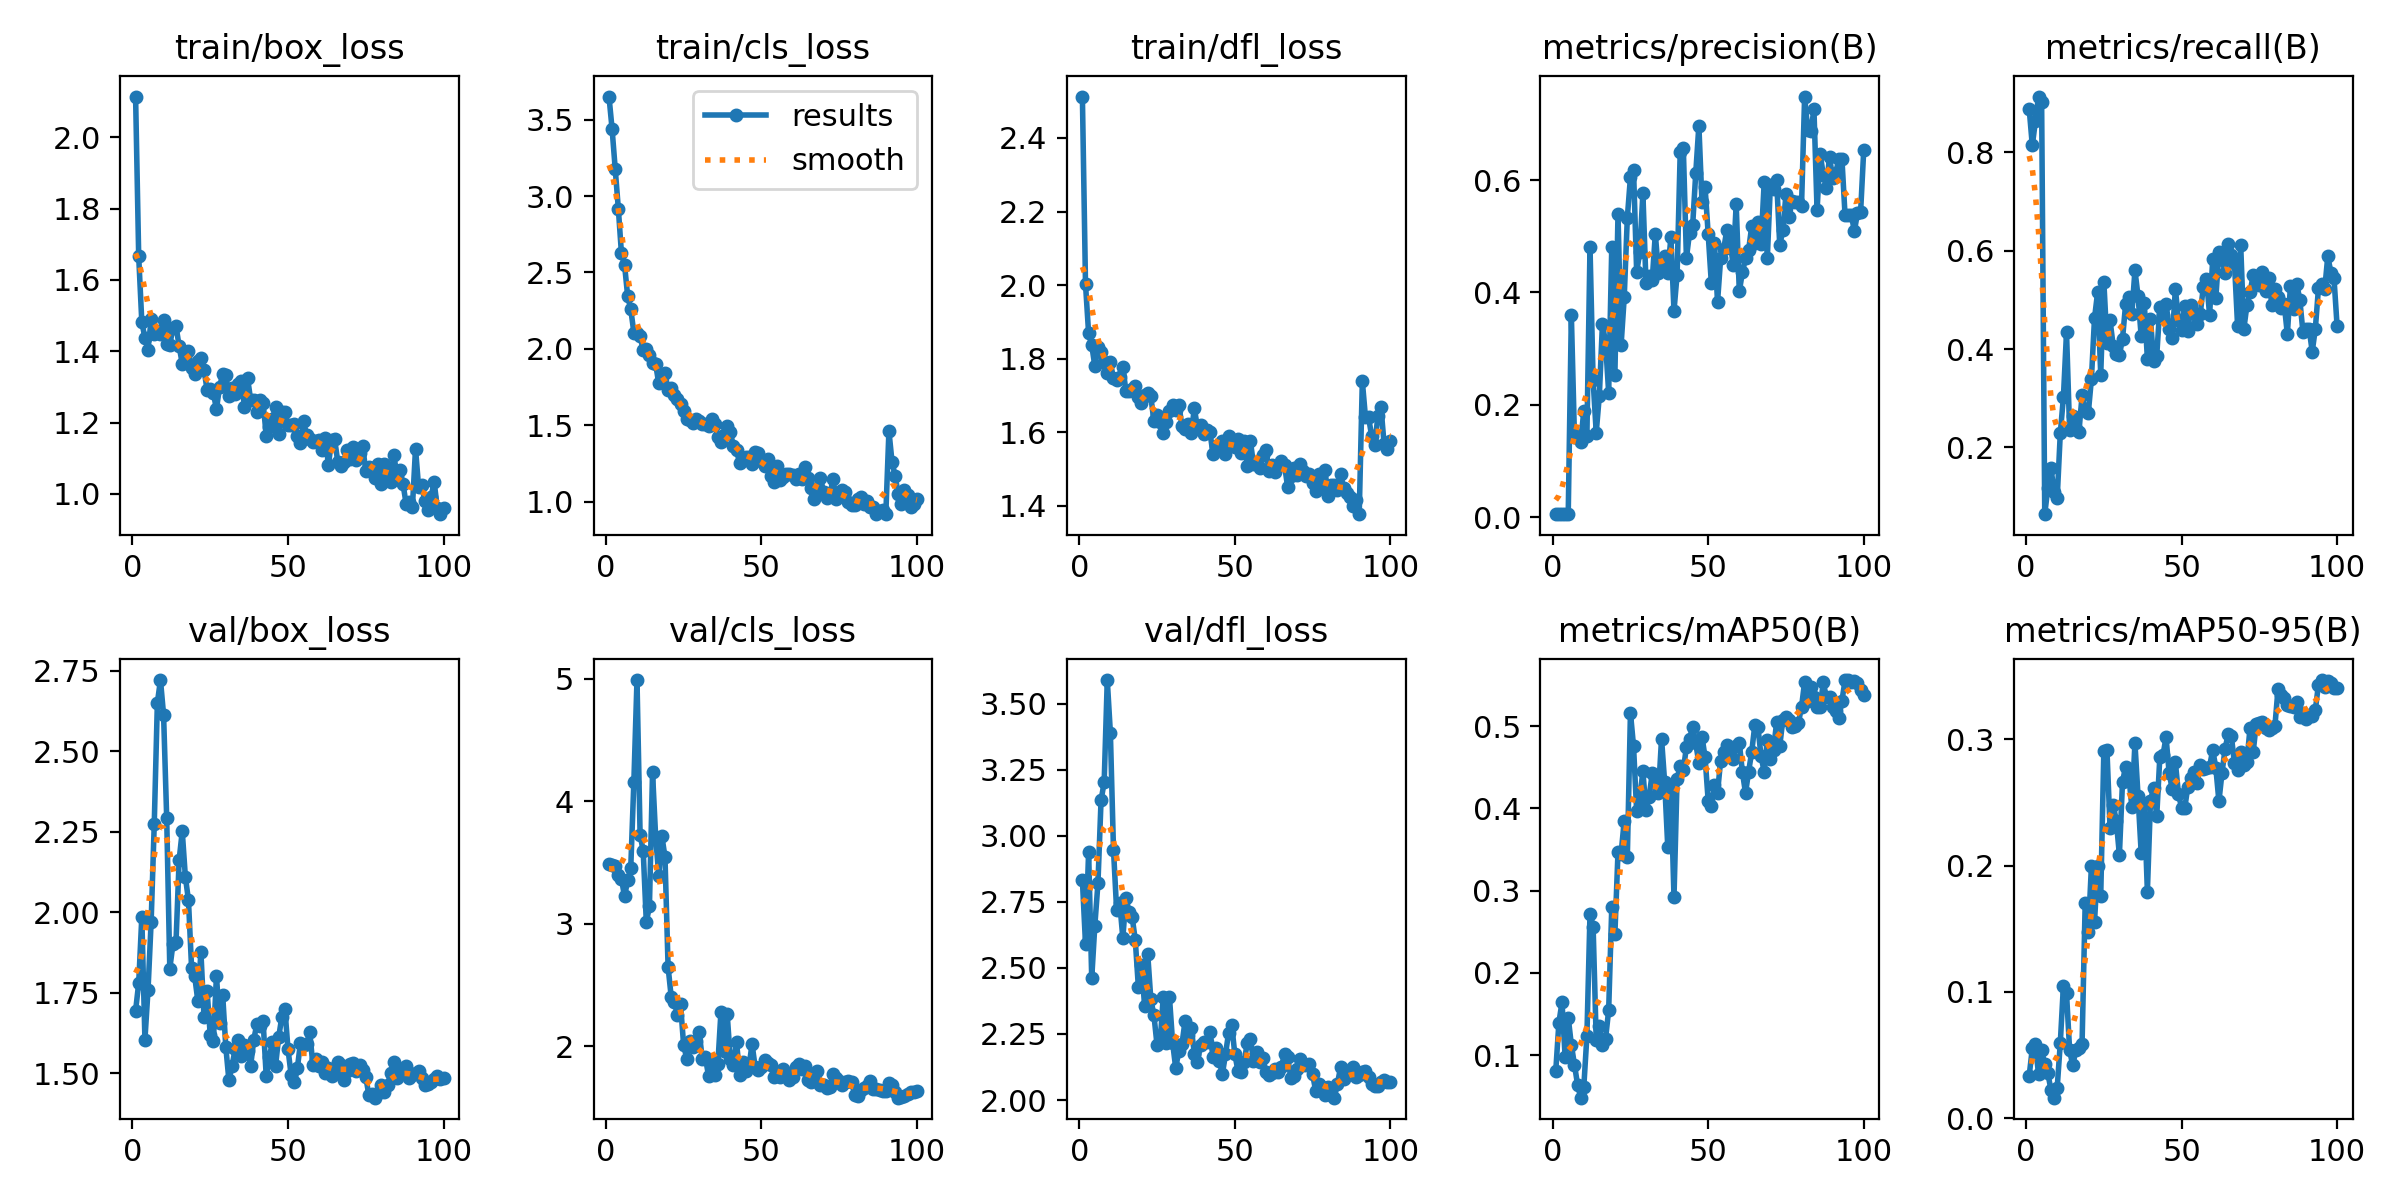

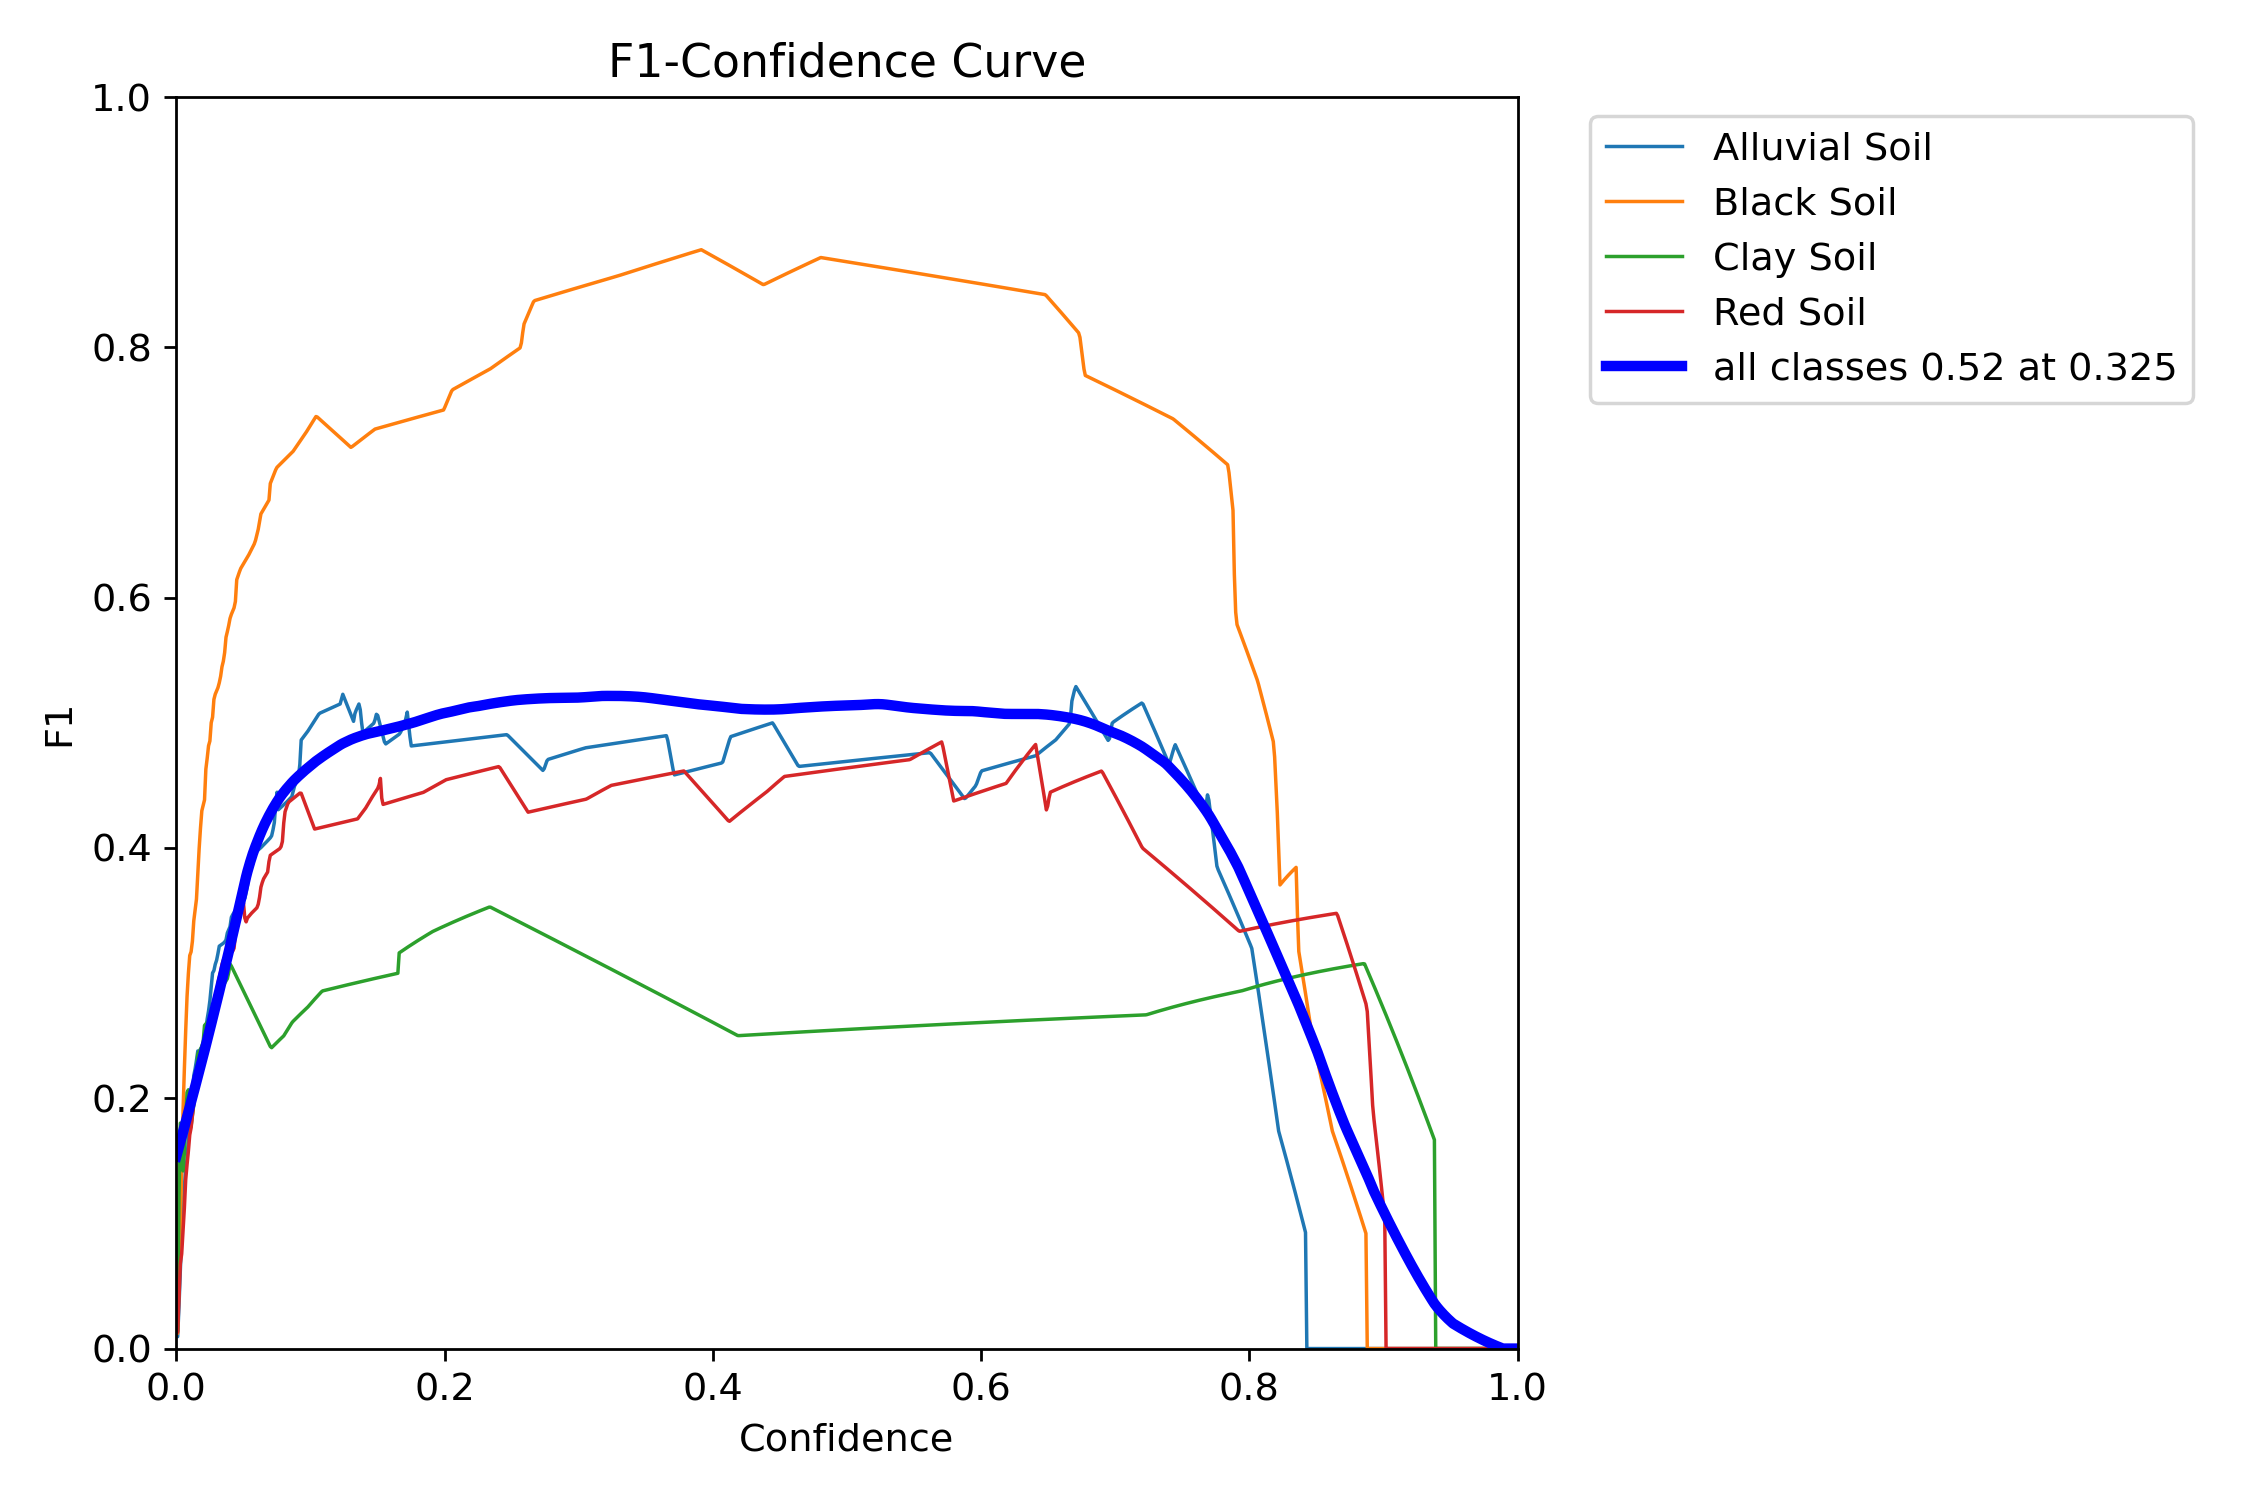

In [15]:
from IPython.display import Image, display

# Path to your training results
result_folder = '/content/runs/detect/yolo_soil_seg'

# Display overall training metrics
display(Image(filename=f'{result_folder}/results.png'))

# Display Box F1 curve
display(Image(filename=f'{result_folder}/BoxF1_curve.png'))

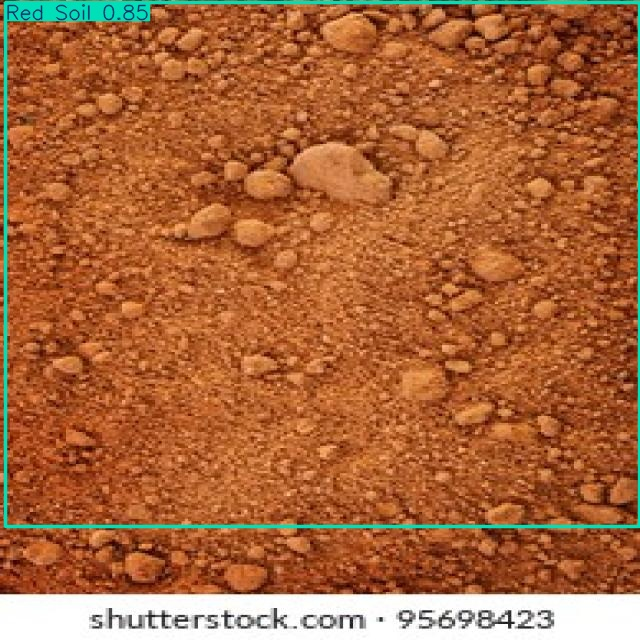

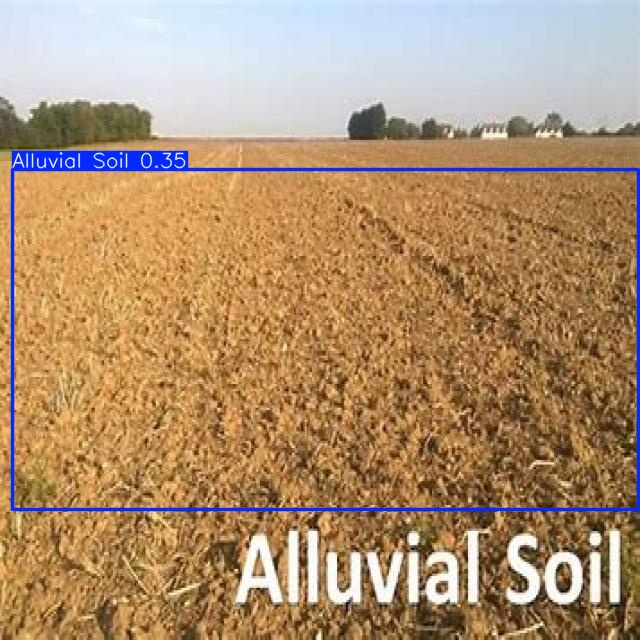

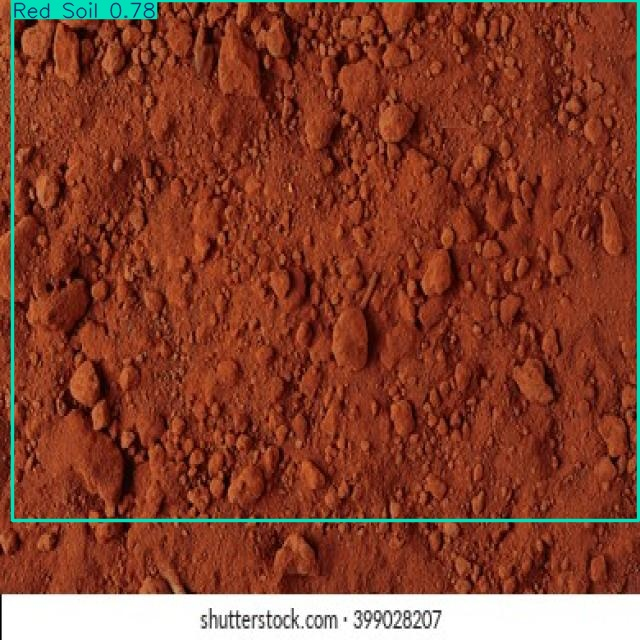

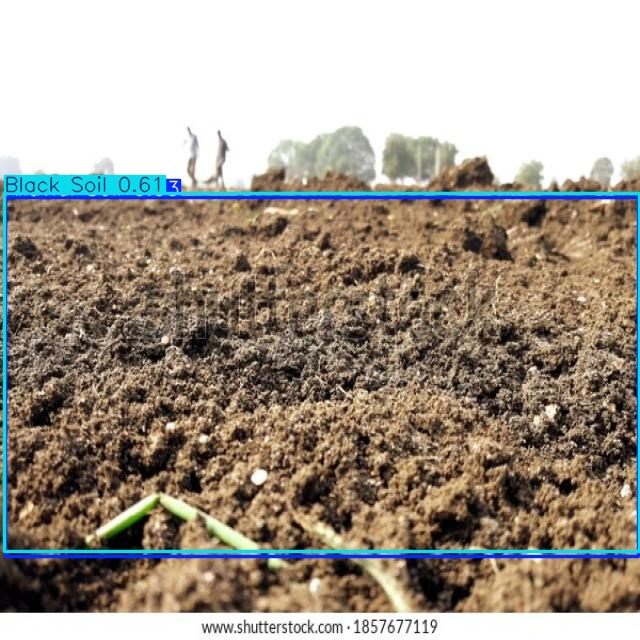

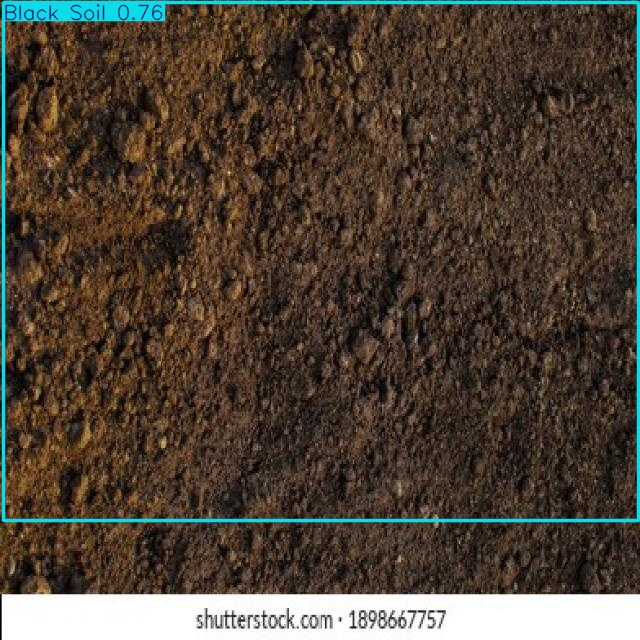

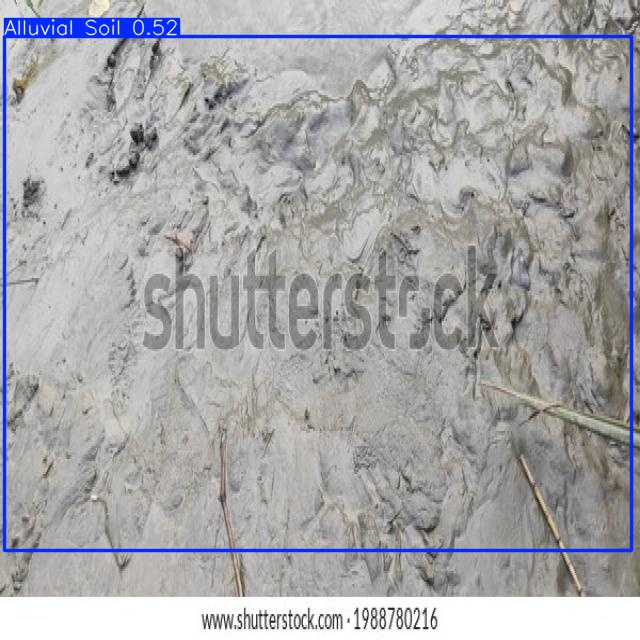

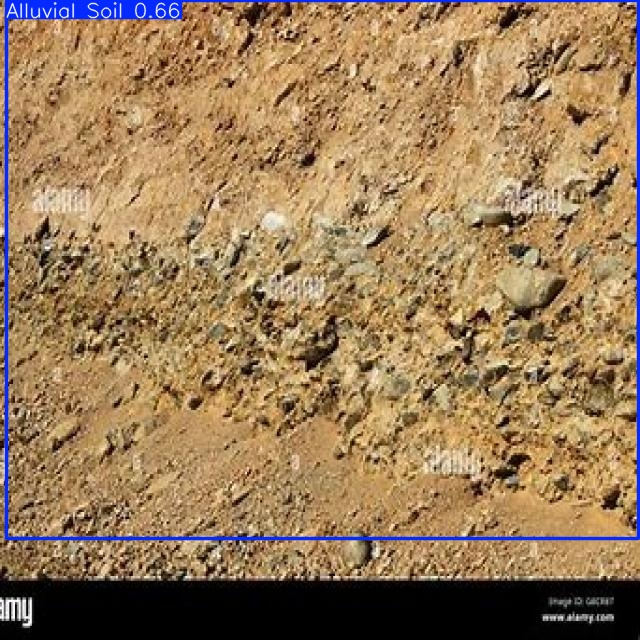

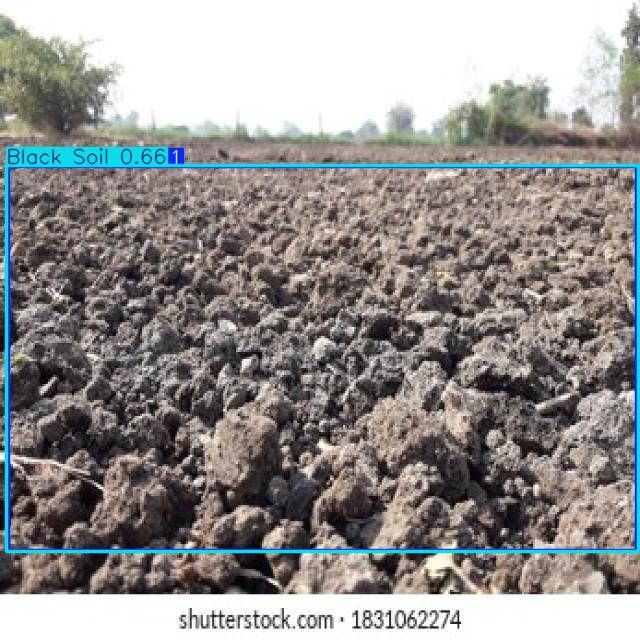

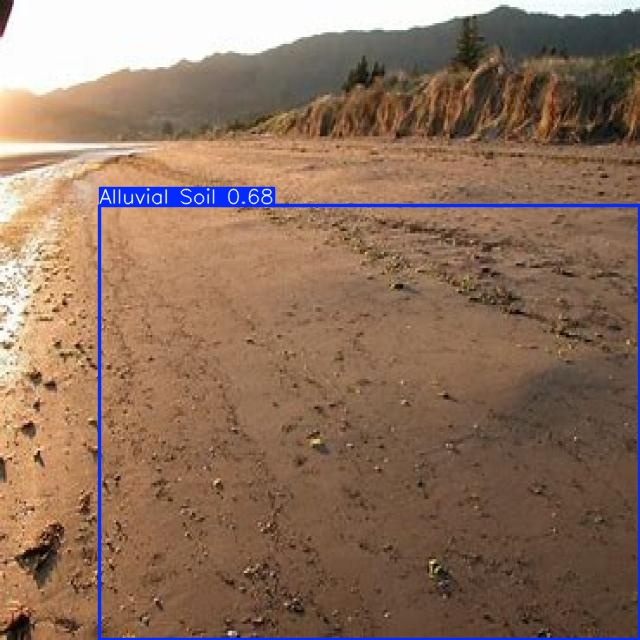

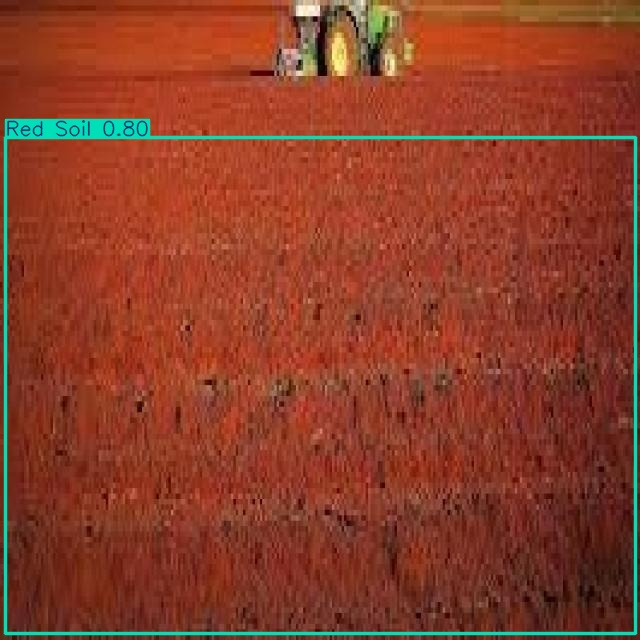

In [16]:
from IPython.display import Image, display
import glob

# Display first 5 predicted images
for img_path in glob.glob('/content/runs/detect/predict/*.jpg')[:10]:
    display(Image(filename=img_path, height=500))

In [20]:
import shutil, os, glob

drive_pred_dir = "/content/drive/MyDrive/Soildetection.v2i.yolov11/predictions"
os.makedirs(drive_pred_dir, exist_ok=True)

for f in glob.glob('/content/runs/detect/predict/*.jpg'):
    shutil.copy(f, drive_pred_dir)
print("✅ Predictions saved to Drive")

✅ Predictions saved to Drive


In [21]:
weights_dir = "/content/drive/MyDrive/Soildetection.v2i.yolov11/trained_weights"
os.makedirs(weights_dir, exist_ok=True)

shutil.copy(
    "/content/runs/detect/yolo_soil_seg/weights/best.pt",
    os.path.join(weights_dir, "yolo_soil_seg_best.pt")
)
print("✅ Model saved to Drive")

✅ Model saved to Drive
